# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [170]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
# Import the style from Matplotlib.
from matplotlib import style
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = os.path.join("Resources", "city_data.csv")
ride_data_to_load = os.path.join("Resources", "ride_data.csv")

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [137]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [30]:
#  1. Get the total rides for each city type
total_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [31]:
# 2. Get the total drivers for each city type
total_drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [15]:
#  3. Get the total amount of fares for each city type
total_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [20]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride_by_type = total_fares_by_type / total_rides_by_type
average_fare_per_ride_by_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [32]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver_by_type = total_fares_by_type / total_drivers_by_type
average_fare_per_driver_by_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [48]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
    "Total Rides": total_rides_by_type,
    "Total Drivers": total_drivers_by_type,
    "Total Fares": total_fares_by_type,
    "Average Fare per Ride": average_fare_per_ride_by_type,
    "Average Fare per Driver": average_fare_per_driver_by_type
})

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [49]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [50]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,.0f}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,.0f}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [51]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [61]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
total_fares_by_date_urban = pyber_data_df.loc[(pyber_data_df["type"]=="Urban")].groupby(["date"]).sum()["fare"]
total_fares_by_date_suburban = pyber_data_df.loc[(pyber_data_df["type"]=="Suburban")].groupby(["date"]).sum()["fare"]
total_fares_by_date_rural = pyber_data_df.loc[(pyber_data_df["type"]=="Rural")].groupby(["date"]).sum()["fare"]

# Assemble the DataFrame.
total_fares_by_date_type_v1_df = pd.DataFrame({
    "Rural": total_fares_by_date_rural,
    "Suburban": total_fares_by_date_suburban,
    "Urban": total_fares_by_date_urban
})
total_fares_by_date_type_v1_df.head(10)

,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [62]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()

# First make a new Version 2, then reset_index() below in Step #4.

In [71]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
total_fares_by_date_type_v2_df = pyber_data_df.groupby(["date", "type"]).sum()[["fare"]]

# Reset the index
total_fares_by_date_type_v2_df = total_fares_by_date_type_v2_df.reset_index()

total_fares_by_date_type_pivot = total_fares_by_date_type_v2_df.pivot(index="date", columns="type", values="fare")

total_fares_by_date_type_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [200]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

start_date = "2019-01-01"
end_date = "2019-04-29"

total_fares_by_date_type_pivot_subset = total_fares_by_date_type_pivot.loc[
    (total_fares_by_date_type_pivot.index>=start_date) & (total_fares_by_date_type_pivot.index<=end_date)]

total_fares_by_date_type_pivot_subset.tail(10)

type,Rural,Suburban,Urban
date,,,
2019-04-28 09:25:03,NaN,NaN,37.35
2019-04-28 10:54:14,NaN,NaN,10.07
2019-04-28 11:40:49,NaN,43.22,NaN
2019-04-28 11:49:26,NaN,39.19,NaN
2019-04-28 12:48:34,NaN,NaN,33.35
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43
2019-04-28 17:38:09,NaN,34.87,NaN


In [201]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
total_fares_by_date_type_pivot_subset.index = pd.to_datetime(total_fares_by_date_type_pivot_subset.index)

In [202]:
# 7. Check that the datatype for the index is datetime using df.info()
total_fares_by_date_type_pivot_subset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [203]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
total_fares_by_week_df = total_fares_by_date_type_pivot_subset.resample("W").sum()

total_fares_by_week_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


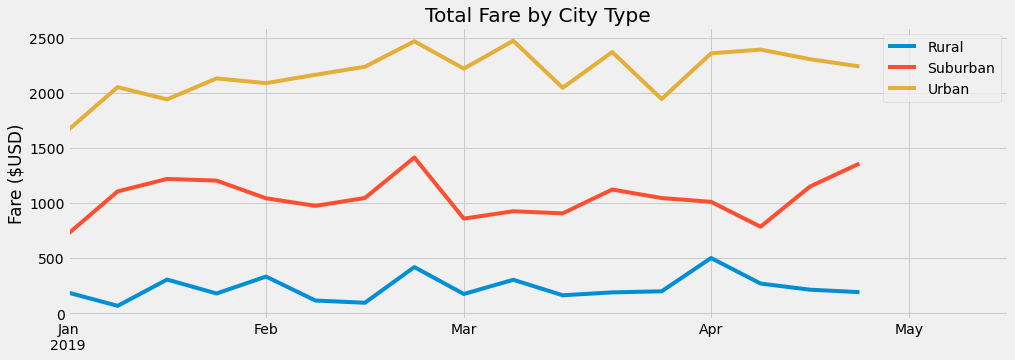

In [204]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fig = total_fares_by_week_df.plot(figsize=(15, 5))
fig.set_xlim("2019-01-01","2019-05-15")
fig.set_title('Total Fare by City Type')
fig.set_ylabel('Fare ($USD)')
fig.set_xlabel('')
fig.legend(loc="upper right", title='')

# Save the figure.
#plt.savefig("analysis/PyBer_fare_summary.png", bbox_inches="tight")


In [150]:
## EXTRA
# Recreate the Bubble Plot from the Module Exercise, using the Challenge Date Range:

# Copy pyber_data_df for Date Range '2019-01-01':'2019-04-29'
pyber_data_subset_df = pyber_data_df

pyber_data_subset_df["date"] = pd.to_datetime(pyber_data_subset_df["date"])

# Filter by start_date2 & end_date2

start_date2 = "2019-01-01"
end_date2 = "2019-04-29"

pyber_data_subset_df = pyber_data_subset_df.loc[(pyber_data_subset_df["date"]>=start_date2) &
                                                (pyber_data_subset_df["date"]<=end_date2)]

pyber_data_subset_df.tail()


,city,date,fare,ride_id,driver_count,type
2367,Michaelberg,2019-01-27 18:43:05,38.42,862622008020,6,Rural
2369,Bradshawfurt,2019-01-30 10:55:23,51.39,1328274868072,7,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2374,Newtonview,2019-04-25 10:20:13,55.84,9990581345298,1,Rural


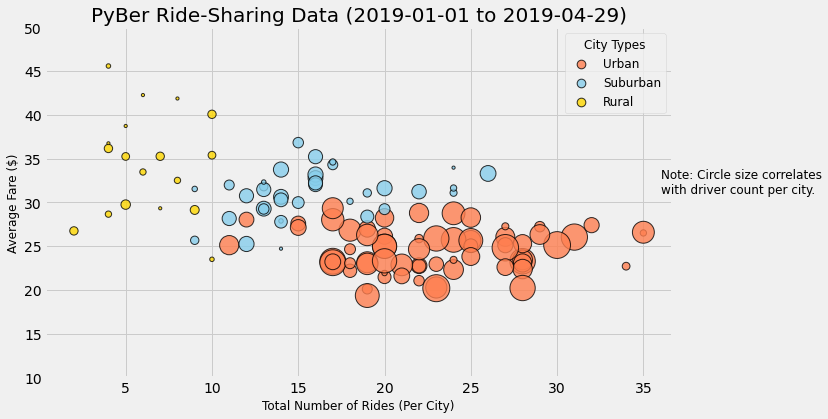

In [160]:
## Number of Rides vs. Avg. Fare Bubble Plot

# Create Data Series:
# Urban Rides
urban_driver_count = pyber_data_subset_df.loc[pyber_data_subset_df["type"]=="Urban"].groupby(["city"]).mean()["driver_count"]
urban_ride_count = pyber_data_subset_df.loc[pyber_data_subset_df["type"]=="Urban"].groupby(["city"]).count()["ride_id"]
urban_avg_fare = pyber_data_subset_df.loc[pyber_data_subset_df["type"]=="Urban"].groupby(["city"]).mean()["fare"]

# Suburban Rides
suburban_driver_count = pyber_data_subset_df.loc[pyber_data_subset_df["type"]=="Suburban"].groupby(["city"]).mean()["driver_count"]
suburban_ride_count = pyber_data_subset_df.loc[pyber_data_subset_df["type"]=="Suburban"].groupby(["city"]).count()["ride_id"]
suburban_avg_fare = pyber_data_subset_df.loc[pyber_data_subset_df["type"]=="Suburban"].groupby(["city"]).mean()["fare"]

# Rural Rides
rural_driver_count = pyber_data_subset_df.loc[pyber_data_subset_df["type"]=="Rural"].groupby(["city"]).mean()["driver_count"]
rural_ride_count = pyber_data_subset_df.loc[pyber_data_subset_df["type"]=="Rural"].groupby(["city"]).count()["ride_id"]
rural_avg_fare = pyber_data_subset_df.loc[pyber_data_subset_df["type"]=="Rural"].groupby(["city"]).mean()["fare"]

# Create Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Urban Rides Bubbles
plt.scatter(urban_ride_count,
           urban_avg_fare,
           s=10*urban_driver_count,
           c="coral",
            edgecolor="black",
            linewidths=1,
            alpha=0.8,
            label="Urban")

# Suburban Rides Bubbles
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count,
      c="skyblue",
      edgecolor="black",
      linewidths=1,
      alpha=0.8,
      label="Suburban")

# Rural Rides Bubbles
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count,
      c="gold",
      edgecolor="black",
      linewidths=1,
      alpha=0.8,
      label="Rural")

# Plot Formatting
plt.title("PyBer Ride-Sharing Data (2019-01-01 to 2019-04-29)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.ylim(10,50)
plt.grid(True)

# Add the legend.
lgnd = plt.legend(fontsize="12",
                  mode="Expanded",
                  scatterpoints=1,
                  loc="best",
                  title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(36, 31, "Note: Circle size correlates\nwith driver count per city.", fontsize="12")

# Show the plot
plt.show()

# Save the figure.
#plt.savefig("analysis/Fig3.png", bbox_inches="tight")

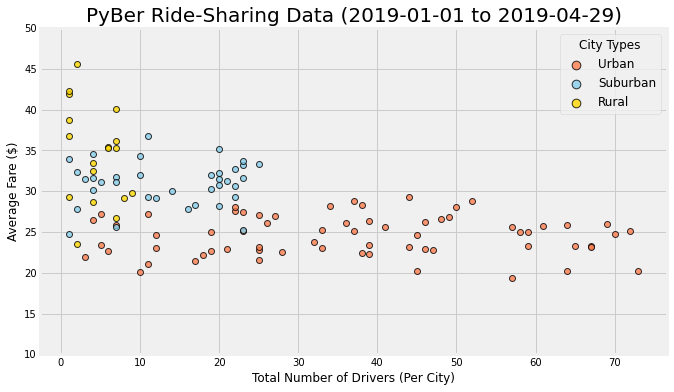

In [193]:
## Number of Drivers vs. Avg. Fare Bubble Plot

# Create Data Series:
# Urban Rides
urban_driver_count = pyber_data_subset_df.loc[pyber_data_subset_df["type"]=="Urban"].groupby(["city"]).mean()["driver_count"]
urban_ride_count = pyber_data_subset_df.loc[pyber_data_subset_df["type"]=="Urban"].groupby(["city"]).count()["ride_id"]
urban_avg_fare = pyber_data_subset_df.loc[pyber_data_subset_df["type"]=="Urban"].groupby(["city"]).mean()["fare"]

# Suburban Rides
suburban_driver_count = pyber_data_subset_df.loc[pyber_data_subset_df["type"]=="Suburban"].groupby(["city"]).mean()["driver_count"]
suburban_ride_count = pyber_data_subset_df.loc[pyber_data_subset_df["type"]=="Suburban"].groupby(["city"]).count()["ride_id"]
suburban_avg_fare = pyber_data_subset_df.loc[pyber_data_subset_df["type"]=="Suburban"].groupby(["city"]).mean()["fare"]

# Rural Rides
rural_driver_count = pyber_data_subset_df.loc[pyber_data_subset_df["type"]=="Rural"].groupby(["city"]).mean()["driver_count"]
rural_ride_count = pyber_data_subset_df.loc[pyber_data_subset_df["type"]=="Rural"].groupby(["city"]).count()["ride_id"]
rural_avg_fare = pyber_data_subset_df.loc[pyber_data_subset_df["type"]=="Rural"].groupby(["city"]).mean()["fare"]

# Create Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Urban Rides Bubbles
plt.scatter(urban_driver_count,
           urban_avg_fare,
           c="coral",
            edgecolor="black",
            linewidths=1,
            alpha=0.8,
            label="Urban")

# Suburban Rides Bubbles
plt.scatter(suburban_driver_count,
      suburban_avg_fare,
      c="skyblue",
      edgecolor="black",
      linewidths=1,
      alpha=0.8,
      label="Suburban")

# Rural Rides Bubbles
plt.scatter(rural_driver_count,
      rural_avg_fare,
      c="gold",
      edgecolor="black",
      linewidths=1,
      alpha=0.8,
      label="Rural")

# Plot Formatting
plt.title("PyBer Ride-Sharing Data (2019-01-01 to 2019-04-29)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Drivers (Per City)", fontsize=12)
plt.ylim(10,50)
plt.grid(True)

# Logarithmic Y-Scale (Un-Comment if Desired)
#plt.yscale('log')

# Add the legend.
lgnd = plt.legend(fontsize="12",
                  mode="Expanded",
                  scatterpoints=1,
                  loc="best",
                  title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
#plt.text(36, 31, "Note: Circle size correlates\nwith driver count per city.", fontsize="12")

# Show the plot
plt.show()

# Save the figure.
#plt.savefig("analysis/FigX.png", bbox_inches="tight")

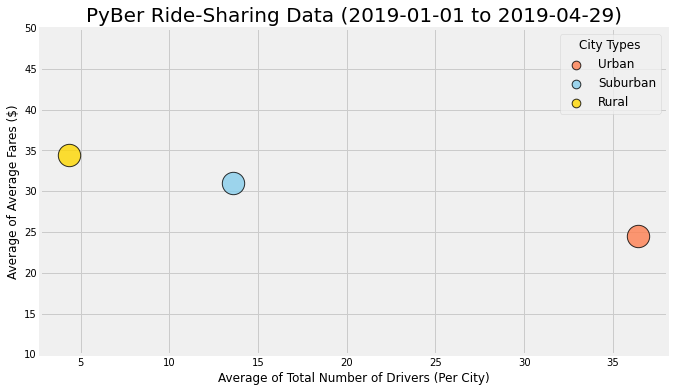

In [192]:
## Number of Drivers vs. Avg. Fare Bubble Plot
## SIMPLIFIED SCATTER PLOTTING ONLY MEANS (3 DATA POINTS ONLY)

# Create Data Series:
# Urban Rides
urban_driver_count_mean = pyber_data_subset_df.loc[pyber_data_subset_df["type"]=="Urban"].groupby(["city"]).mean()["driver_count"].mean()
urban_ride_count = pyber_data_subset_df.loc[pyber_data_subset_df["type"]=="Urban"].groupby(["city"]).count()["ride_id"]
urban_avg_fare_mean = pyber_data_subset_df.loc[pyber_data_subset_df["type"]=="Urban"].groupby(["city"]).mean()["fare"].mean()

# Suburban Rides
suburban_driver_count_mean = pyber_data_subset_df.loc[pyber_data_subset_df["type"]=="Suburban"].groupby(["city"]).mean()["driver_count"].mean()
suburban_ride_count = pyber_data_subset_df.loc[pyber_data_subset_df["type"]=="Suburban"].groupby(["city"]).count()["ride_id"]
suburban_avg_fare_mean = pyber_data_subset_df.loc[pyber_data_subset_df["type"]=="Suburban"].groupby(["city"]).mean()["fare"].mean()

# Rural Rides
rural_driver_count_mean = pyber_data_subset_df.loc[pyber_data_subset_df["type"]=="Rural"].groupby(["city"]).mean()["driver_count"].mean()
rural_ride_count = pyber_data_subset_df.loc[pyber_data_subset_df["type"]=="Rural"].groupby(["city"]).count()["ride_id"]
rural_avg_fare_mean = pyber_data_subset_df.loc[pyber_data_subset_df["type"]=="Rural"].groupby(["city"]).mean()["fare"].mean()

# Create Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Urban Rides Bubbles
plt.scatter(urban_driver_count_mean,
            urban_avg_fare_mean,
            s=500,
            c="coral",
            edgecolor="black",
            linewidths=1,
            alpha=0.8,
            label="Urban")

# Suburban Rides Bubbles
plt.scatter(suburban_driver_count_mean,
      suburban_avg_fare_mean,
      s=500,
      c="skyblue",
      edgecolor="black",
      linewidths=1,
      alpha=0.8,
      label="Suburban")

# Rural Rides Bubbles
plt.scatter(rural_driver_count_mean,
      rural_avg_fare_mean,
      s=500,
      c="gold",
      edgecolor="black",
      linewidths=1,
      alpha=0.8,
      label="Rural")

# Plot Formatting
plt.title("PyBer Ride-Sharing Data (2019-01-01 to 2019-04-29)", fontsize=20)
plt.ylabel("Average of Average Fares ($)", fontsize=12)
plt.xlabel("Average of Total Number of Drivers (Per City)", fontsize=12)
plt.ylim(10,50)
plt.grid(True)

# Logarithmic Y-Scale (Un-Comment if Desired)
#plt.yscale('log')

# Add the legend.
lgnd = plt.legend(fontsize="12",
                  mode="Expanded",
                  scatterpoints=1,
                  loc="best",
                  title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
#plt.text(36, 31, "Note: Circle size correlates\nwith driver count per city.", fontsize="12")

# Show the plot
plt.show()

# Save the figure.
#plt.savefig("analysis/FigY.png", bbox_inches="tight")

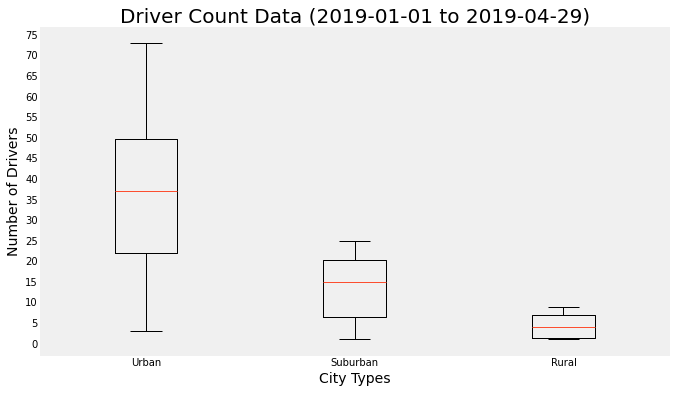

In [197]:
## Recreate Driver Count Boxplot from Module Exercise, using date-filtered df:

x_labels = ["Urban", "Suburban","Rural"]
driver_data = [urban_driver_count, suburban_driver_count, rural_driver_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019-01-01 to 2019-04-29)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(driver_data, labels=x_labels)
ax.set_yticks(np.arange(0, 76, step=5.0))
ax.grid()

# Show the plot
plt.show()

# Save the figure.
#plt.savefig("analysis/Fig4.png")
